In [1]:
import numpy as np

import benchmark
%load_ext autoreload
%autoreload 2

from benchmark import *
from DO import *
from ODO import *
from MWU import *
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

In [48]:
game_solving_functions = [DO_gurobi, DO_scipy, lp, multiplicative_weights_update, online_double_oracle]
# game_solving_functions = [online_double_oracle]
game_solving_functions_np = np.array(game_solving_functions)

min_size = 100
max_size = 5000
step = 100

max_time = 2

iters = 20

In [50]:
solvers_times = np.zeros(((max_size-min_size)//step + 1, len(game_solving_functions)))
solvers_iters = np.zeros(((max_size-min_size)//step + 1, len(game_solving_functions)))

active_solvers = [i for i in range(len(game_solving_functions))]
solvers_last_iter = np.zeros(len(game_solving_functions), dtype=int)

generator = GaussianSumGameGenerator(bank=iters, bank_size=max_size)
print("Generator ready")
pbar = trange(min_size, max_size + 1, step)
pbar.set_postfix({"Game size": min_size})
for i, game_size in enumerate(pbar):
    results = benchmark_game_solver(game_solving_functions_np[active_solvers],
                                    generator.generate,
                                    # generate_random_game_of_size,
                                    [(), (), (), (), ()],
                                    (game_size,), iters, [True, True, False, True, True],
                                    verbose=False)
    solvers_times[i][active_solvers] = results['times'].mean(axis=1)
    solvers_iters[i][active_solvers] = results['iterations'].mean(axis=1)

    postfix = {"Game size": game_size , "Generation time": results['generating_time']}
    for j in active_solvers:
        postfix[game_solving_functions[j].__name__] = f'{solvers_times[i, j]:.2f}'
        if solvers_times[i, j] > max_time:
            solvers_last_iter[j] = i + 1
    active_solvers[:] = [j for j in active_solvers if solvers_times[i, j] < max_time]
    pbar.set_postfix(postfix)

    for j in active_solvers:
        solvers_last_iter[j] = i + 1

Generator ready


100%|██████████| 50/50 [09:11<00:00, 11.03s/it, Game size=5000, Generation time=14, DO_gurobi=0.11, DO_scipy=0.09]             


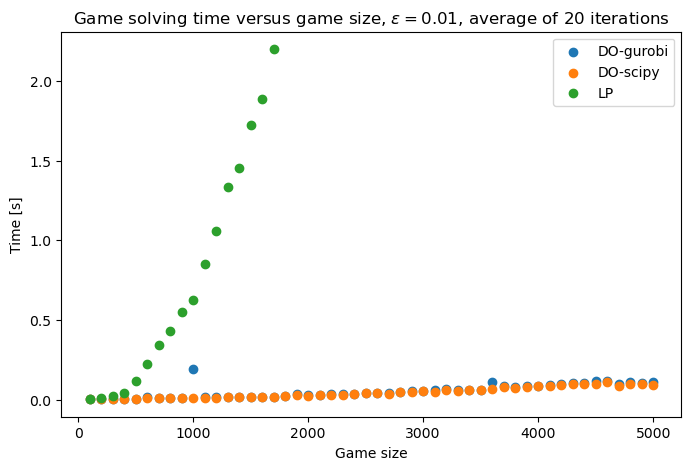

In [52]:
plt.subplots(figsize=(8, 5))
# plt.plot(range(min_size, 5001, step), solvers_times_reserve)
x_values = np.arange(min_size, max_size + 1, step, dtype=int)
for i in range(len(game_solving_functions)):
    plt.scatter(x_values[:solvers_last_iter[i]], solvers_times[:solvers_last_iter[i],i])
#plt.plot(range(min_size, max_size + 1, step), solvers_times)
plt.legend(['DO-gurobi', 'DO-scipy', 'LP', 'MWU', 'ODO'])
plt.xlabel('Game size')
plt.ylabel('Time [s]')
plt.title('Game solving time versus game size, $\\varepsilon=0.01$, average of 20 iterations')
plt.savefig('solving_times_gauss_5000.png')

In [39]:
from copy import deepcopy
solvers_iters_reserve = deepcopy(solvers_iters)
solvers_times_reserve = deepcopy(solvers_times)
solvers_last_iter_reserve = deepcopy(solvers_last_iter)
solvers_iters_reserve2 = deepcopy(solvers_iters)
solvers_times_reserve2 = deepcopy(solvers_times)
solvers_last_iter_reserve2 = deepcopy(solvers_last_iter)

In [38]:
solvers_times_reserve[41:] = None
solvers_iters_reserve[41:] = None

In [47]:
np.save('solvers_iters_random_500.npy', solvers_iters)
np.save('solvers_times_random_500.npy', solvers_times)
np.save('solvers_last_iter_random_500.npy', solvers_last_iter)

(23, 5)
(23,)


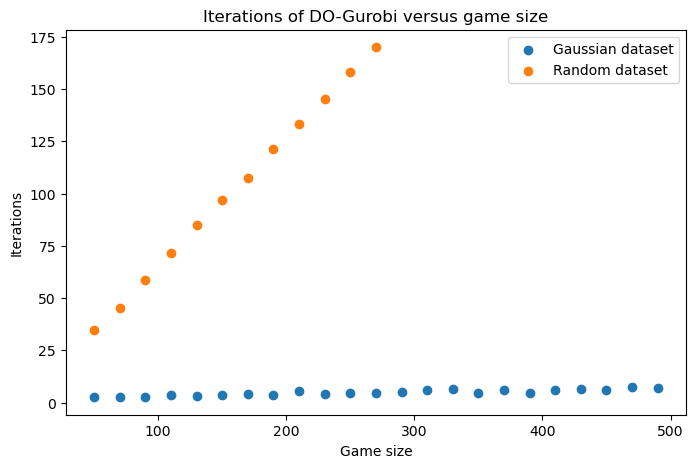

In [65]:
plt.subplots(figsize=(8, 5))
print(solvers_iters_gauss_500.shape)
print(np.arange(50, 501, 20).shape)
plt.scatter(range(50, 501, 20), solvers_iters_gauss_500[:,0])
plt.scatter(range(50, 501, 20)[:12], solvers_iters_random_500[:12,0])
#plt.plot(range(min_size, max_size + 1, step), solvers_iters)
plt.legend(['Gaussian dataset', "Random dataset"])
plt.xlabel('Game size')
plt.ylabel('Iterations')
plt.title('Iterations of DO-Gurobi versus game size')
plt.savefig('DO_iterations.png')

In [44]:
print(solvers_times)
print(solvers_last_iter)

[[0.05412008 0.04267085 0.00318765 0.32749777 2.26763368]
 [0.11233358 0.08442497 0.0050235  0.45167338 0.        ]
 [0.12749944 0.10743231 0.00668675 0.45439714 0.        ]
 [0.19492135 0.15563412 0.00881458 0.64144448 0.        ]
 [0.31884611 0.25528149 0.01261708 0.78131969 0.        ]
 [0.4089468  0.38996922 0.02021914 0.90060759 0.        ]
 [0.55425238 0.56843911 0.02799424 0.91781334 0.        ]
 [0.75298366 0.71388704 0.03490015 0.92812476 0.        ]
 [0.85874245 0.92304409 0.04253648 0.92991411 0.        ]
 [1.13487953 1.26315303 0.05528434 1.03022577 0.        ]
 [1.72936868 1.91266461 0.08542017 1.27681029 0.        ]
 [2.26584497 2.73908523 0.11629903 1.39586367 0.        ]
 [0.         0.         0.18007656 1.68139271 0.        ]
 [0.         0.         0.16496026 1.52536412 0.        ]
 [0.         0.         0.21501583 1.58734698 0.        ]
 [0.         0.         0.23273015 1.60077859 0.        ]
 [0.         0.         0.33192645 1.91688974 0.        ]
 [0.         0

In [54]:
solvers_iters_random_500 = np.load('solvers_iters_random_500.npy')
solvers_iters_gauss_500 = np.load('solvers_iters_gauss_500.npy')